In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 

In [2]:
data=pd.read_csv('delivery_time.csv')#read the data inside the csv file
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()#gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()#gives the parameters of the data set

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


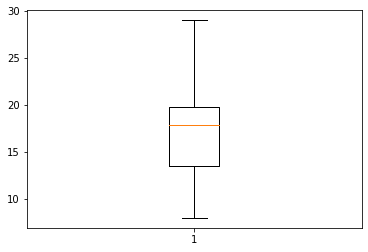

In [5]:
plt.boxplot(data.DeliveryTime)# for checking the outliers in delivery time
plt.show()

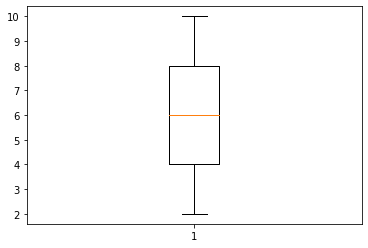

In [6]:
plt.boxplot(data.SortingTime)#for checking outlier in sorting time
plt.show()

In [7]:
data.corr()      #gives the corellation between the two variables

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


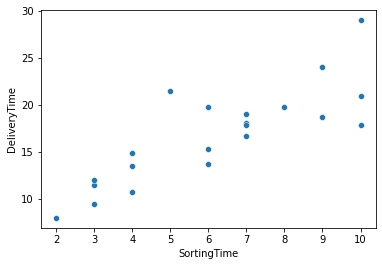

In [8]:
sns.scatterplot(data.SortingTime,data.DeliveryTime)
plt.show()

# Developing the model 1

In [9]:
model1=smf.ols('DeliveryTime~SortingTime',data=data).fit()#develping a model using ols

In [10]:
model1.params             #gives the parameters of the value

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [11]:
model1.rsquared           # gives r squared value

0.6822714748417231

In [12]:
model1.summary()           #summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.98e-06
Time:                        12:22:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

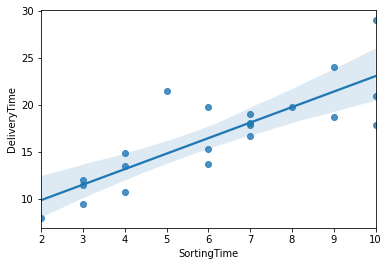

In [13]:
sns.regplot(data.SortingTime,data.DeliveryTime)

In [14]:
model1.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

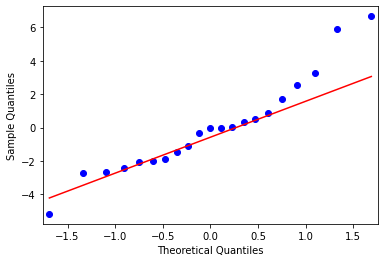

In [15]:
qqplot=sm.qqplot(model1.resid,line='q')

In [16]:
model1.predict()#predict values of the equation

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [17]:
predict1=model1.predict()

In [18]:
rmse1=np.sqrt(np.mean((np.array([data.DeliveryTime])-np.array(predict1))**2))
rmse1

2.7916503270617654

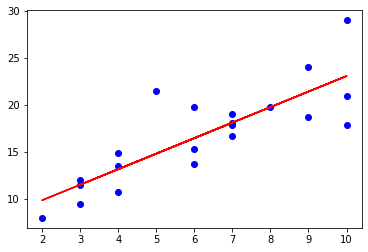

In [19]:
plt.scatter(data.SortingTime,data.DeliveryTime,c='b')
plt.plot(data.SortingTime,predict1,'r')

# since the rsquared value is less we are developing a another model by log function


In [20]:
model2=smf.ols('DeliveryTime~np.log(SortingTime)',data=data).fit()

In [21]:
model2.params

Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64

In [22]:
model2.rsquared

0.6954434611324223

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           2.64e-06
Time:                        12:22:05   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
predict2=model2.predict()
predict2

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

In [25]:
rmse1=np.sqrt(np.mean((np.array([data.DeliveryTime])-np.array(predict2))**2))
rmse1

2.7331714766820663

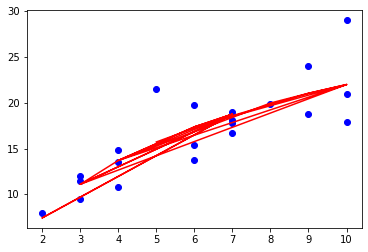

In [26]:
plt.scatter(data.SortingTime,data.DeliveryTime,c='b')
plt.plot(data.SortingTime,predict2,'r')

In [27]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

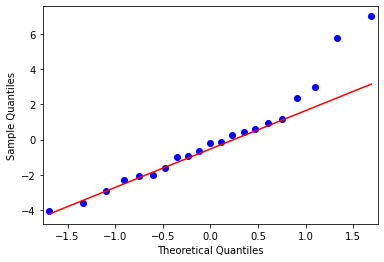

In [28]:
qqplot2=sm.qqplot(model2.resid,line='q')

In [29]:
data1=data

In [30]:
data1['sortingtime_sq']=data.SortingTime*data.SortingTime
data1

,DeliveryTime,SortingTime,sortingtime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [31]:
model3=smf.ols('np.log(DeliveryTime)~SortingTime+sortingtime_sq',data=data1).fit()

In [32]:
model3.params

Intercept         1.699704
SortingTime       0.265922
sortingtime_sq   -0.012841
dtype: float64

In [33]:
predict3=model3.predict(data1)
predict3=np.exp(predict3)
predict3

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [34]:
rmse3=np.sqrt(np.mean((np.array([data1.DeliveryTime])-np.array(predict3))**2))
rmse3

2.7990419887409272

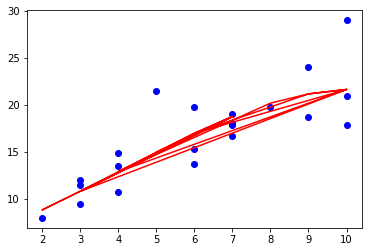

In [35]:
plt.scatter(data1.SortingTime,data1.DeliveryTime,c='b')
plt.plot(data1.SortingTime,predict3,'r')

In [36]:
model3.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

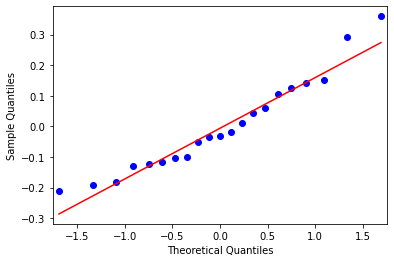

In [37]:
qqplot3=sm.qqplot(model3.resid,line='q')

In [38]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Tue, 23 Feb 2021   Prob (F-statistic):           2.20e-06
Time:                          12:22:14   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
sortingtime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

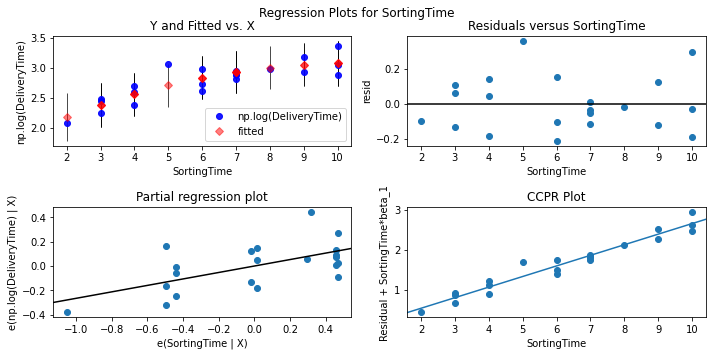

In [39]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model3, "SortingTime", fig=fig)
plt.show()

# developing model4

In [32]:
model4=smf.ols('np.log(DeliveryTime)~SortingTime',data=data).fit()

In [33]:
model4.params

Intercept      2.121372
SortingTime    0.105552
dtype: float64

In [34]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 29 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                          16:10:43   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
predict4=model4.predict(data)
predict4=np.exp(predict4)
predict4

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [43]:
rmse4=np.sqrt(np.mean((np.array([data1.DeliveryTime])-np.array(predict4))**2))
rmse4

2.940250323056201

# predicting a new value

In [54]:
newdata=pd.DataFrame({'SortingTime':12,'sortingtime_sq':144},index=[1])

In [55]:
predictedvalue=model3.predict(newdata)
np.exp(predictedvalue)

1    20.941243
dtype: float64